##### Analysis of Kaggle dataset https://www.kaggle.com/datasets/chriskachmar/amazon-top-50-bestselling-books-2009-2022

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.lines import Line2D
from pylab import plot, show
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

from scipy import stats
from scipy.stats import norm, skew 
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('bestsellers_with_categories_2022_03_27.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


In [4]:
df.shape

(700, 7)

In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,700.000000,700.000000,700.000000,700.000000
mean,4.639857,19255.195714,12.700000,2015.500000
std,0.218586,23613.443875,9.915162,4.034011
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4987.250000,7.000000,2012.000000
50%,4.700000,10284.000000,11.000000,2015.500000
75%,4.800000,23358.000000,15.000000,2019.000000
max,4.900000,208917.000000,105.000000,2022.000000


##### CONCLUSIONS:

##### -bestsellers has minimal rating 3.3 and maximal rating 4.9 
##### -some of them are free (minimal price is 0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


In [7]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [8]:
df['Genre'].value_counts()

Non Fiction    388
Fiction        312
Name: Genre, dtype: int64

##### Let's check the proportion of each genre

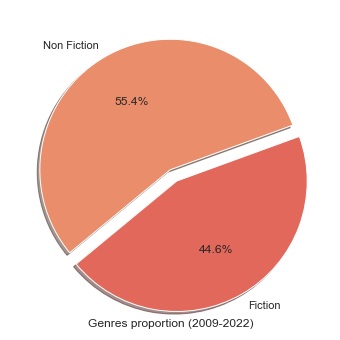

In [9]:
pie_p = df['Genre'].value_counts()

sns.set_palette('flare')
plt.figure(figsize=(6,6))
plt.pie(pie_p,explode = [0,0.10],labels=['Non Fiction','Fiction'],autopct='%.1f%%',shadow=True,startangle=20)
plt.title('Genres proportion (2009-2022)',fontdict={'size':12},y=0);

##### 55.4% books are Non Fiction

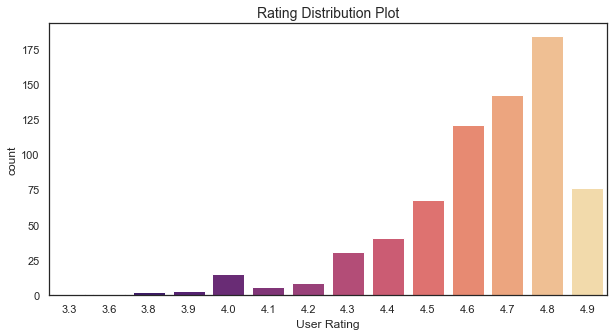

In [10]:
#let's analize rating distrbution
plt.figure(figsize=(10,5))
sns.countplot(x=df['User Rating'],palette='magma')
plt.title('Rating Distribution Plot',fontsize=14)
plt.show()

<AxesSubplot:xlabel='Genre', ylabel='Count'>

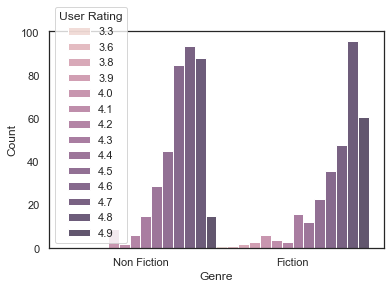

In [11]:
#User Rating distributions of different genres
sns.histplot(data=df , x="Genre", hue="User Rating", multiple='dodge')

##### CONCLUSIONS:

##### -user rating is left skewed (negative skewness) if we don't include rating 4.9
##### -most of the books has rating from 4 to 4.8

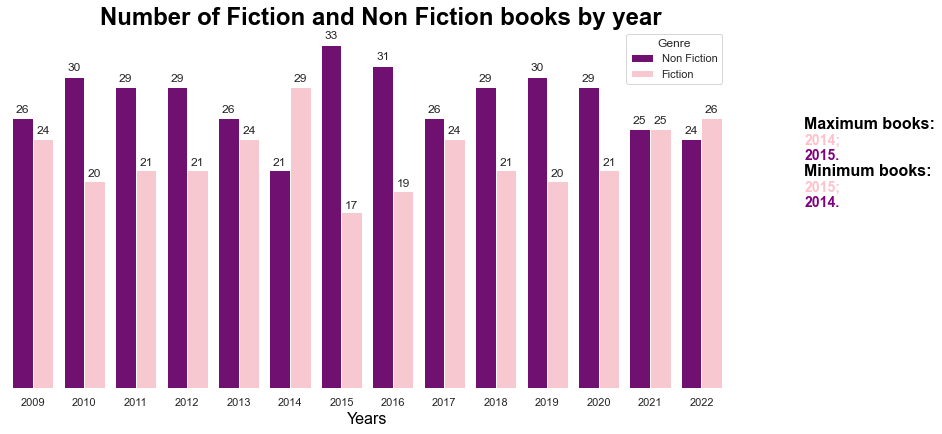

In [12]:
# fig
fig = plt.figure(figsize=(10,5))

# axes
axes = fig.add_axes([0,0,1,1])

# countplot
sns.countplot(x=df['Year'], hue=df['Genre'], palette=['Purple','Pink'], ax=axes)

# spines
axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# ticks
axes.set_yticks([])

# bar's annotate
for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')

# lables
axes.set_xlabel('Years', fontsize=16, color='black')
axes.set_ylabel('')

# title
axes.text(1.3, 35, 'Number of Fiction and Non Fiction books by year', color='Black', fontsize=24, fontweight='bold', label='Fiction books')

# conclusion
axes.text(15, 25, 'Maximum books:', fontsize=16, color='black', fontweight='bold')
axes.text(15, 23.5, '2014;', fontsize=14, color='Pink', fontweight='bold')
axes.text(15, 22, '2015.', fontsize=14, color='Purple', fontweight='bold')
axes.text(15, 20.5, 'Minimum books:', fontsize=16, color='black', fontweight='bold')
axes.text(15, 19, '2015;', fontsize=14, color='Pink', fontweight='bold')
axes.text(15, 17.5, '2014.', fontsize=14, color='Purple', fontweight='bold')
fig.show()


##### The Countplot shows the number of fiction vs non fiction books among the best sellers between 2009 and 2022.
##### In 2014 and 2022 the number of fiction best sellers have been greater than non fiction best sellers books. 
##### In 2021 the number of fiction vs non fiction books is equal.

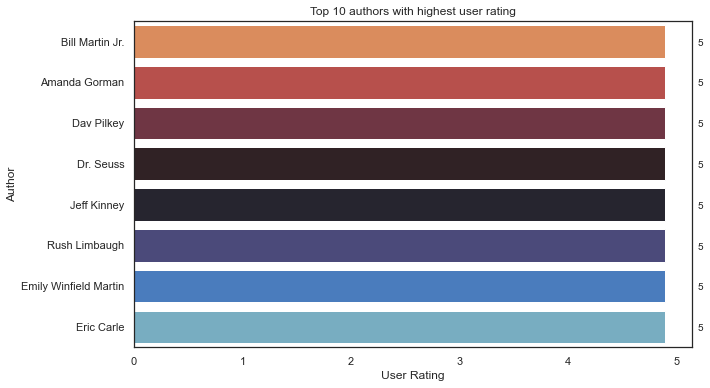

In [13]:
most_rated = df.sort_values('User Rating', ascending = False).head(10).set_index('Author')
plt.figure(figsize=(10,6))
ax = sns.barplot(most_rated['User Rating'], most_rated.index, palette='icefire_r')
ax.set_title("Top 10 authors with highest user rating")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

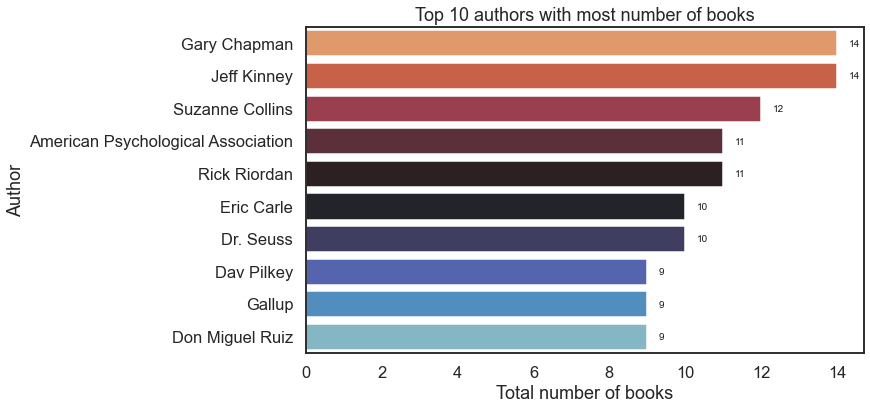

In [14]:
#Authors with most number of books
sns.set_context('talk')
most_books = df.groupby('Author')['Name'].count().reset_index().sort_values('Name', ascending=False).head(10).set_index('Author')
plt.figure(figsize=(10,6))
ax = sns.barplot(most_books['Name'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most number of books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

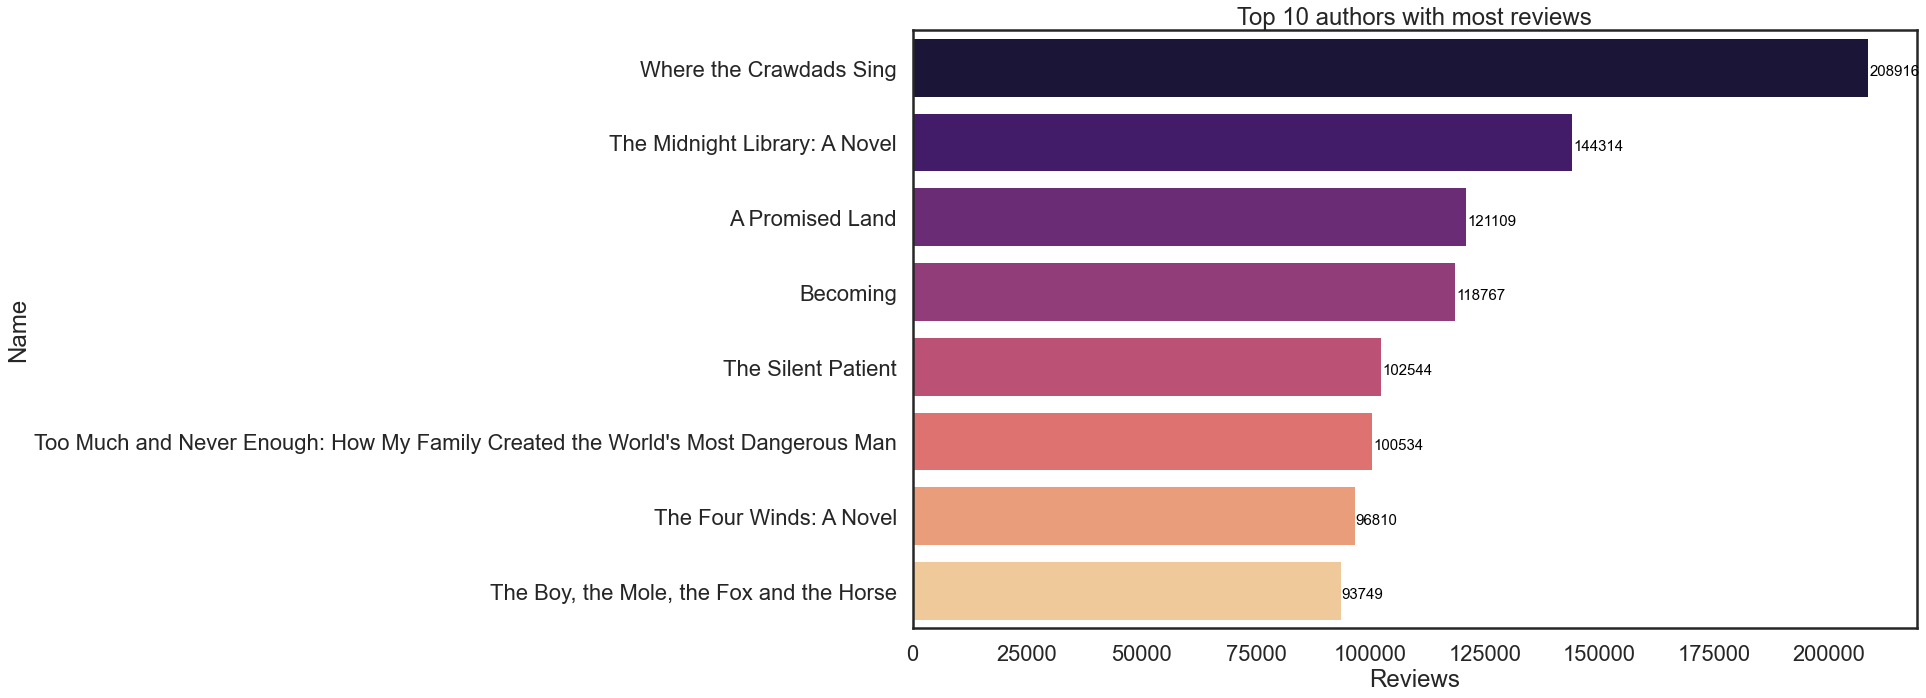

In [15]:
most_text = df.sort_values('Reviews', ascending = False).head(10).set_index('Name')
plt.figure(figsize=(18,11))
sns.set_context('poster')
ax = sns.barplot(most_text['Reviews'], most_text.index, palette='magma')
ax.set_title("Top 10 authors with most reviews")
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

##### With the heatmap, it can be easily seen that the features have very less correlation coefficient  to each other.

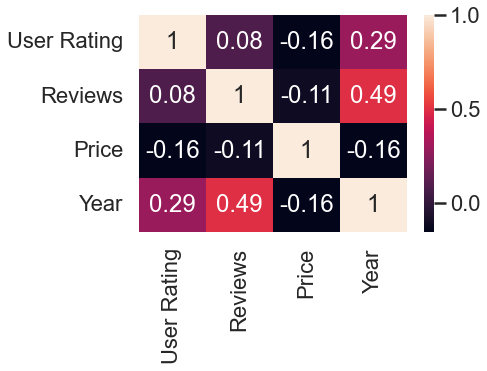

In [16]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

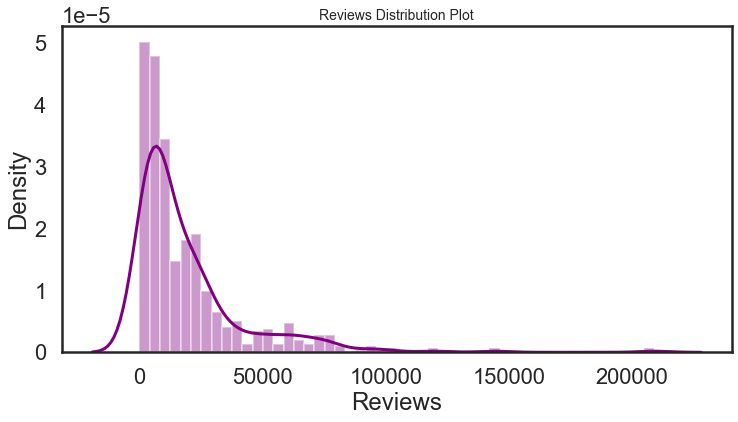

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(df['Reviews'],color='purple')
plt.title('Reviews Distribution Plot',fontsize=14)
plt.show()


##### Reviews beyond 45000 can be considered as outliers

In [18]:
# remove outliers from Reviews
df = df.drop(df.index[df['Reviews'] >= 43000])

<AxesSubplot:xlabel='Reviews'>

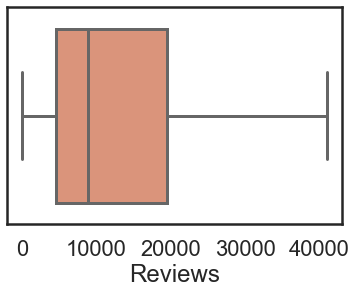

In [19]:
# find Reviews outliers
sns.boxplot(x=df['Reviews'])

In [20]:
df['free_or_not_free'] = df['Price'].apply(lambda price:  'free' if not price else 'not free')
df['free_or_not_free'].value_counts()

not free    603
free         12
Name: free_or_not_free, dtype: int64

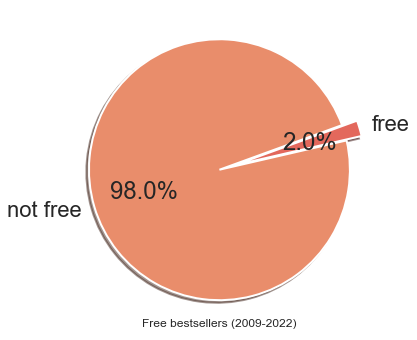

In [21]:
pie_p = df['free_or_not_free'].value_counts()

sns.set_palette('flare')
plt.figure(figsize=(6,6))
plt.pie(pie_p,explode = [0,0.12],labels=['not free', 'free'],autopct='%.1f%%',shadow=True,startangle=20)
plt.title('Free bestsellers (2009-2022)',fontdict={'size':12},y=0);

In [22]:
np.mean(df.loc[df['Genre'] == 'Fiction', 'Price'])

10.732824427480915

In [23]:
np.mean(df.loc[df['Genre'] == 'Non Fiction', 'Price'])

14.685552407932011

In [24]:
np.max(df.loc[df['Genre'] == 'Non Fiction', 'Price'])

105

In [25]:
np.max(df.loc[df['Genre'] == 'Fiction', 'Price'])

82

##### Fiction books are at average and at max are cheaper than non fiction books.

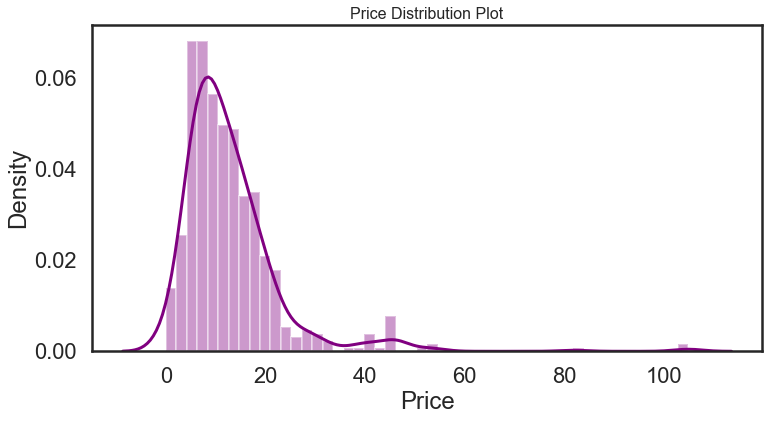

In [26]:
#let's analize price distrbution
plt.figure(figsize=(12,6))
sns.distplot(df['Price'],color='purple')
plt.title('Price Distribution Plot',fontsize=16)
plt.show()

In [27]:
# remove outliers from Price
df = df.drop(df.index[df['Price'] >= 25])

<AxesSubplot:xlabel='Price'>

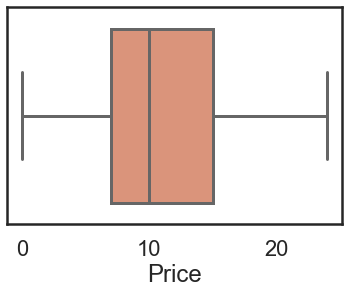

In [28]:
# find Price outliers
sns.boxplot(x=df['Price'])

#### Random Forest Classifier to predict Genre

In [29]:
X = np.array(df[['Reviews', 'Price', 'Year', 'User Rating']])
Y = np.array(df[['Genre']]).ravel()

In [30]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=109) # 80% training and 20% test

In [31]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [32]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8695652173913043


#### Predict User Rating of a Book with GradientBoostingRegressor

In [33]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

LE.fit(df['Genre'])
df['Genre']=LE.transform(df['Genre'])


LE.fit(df['free_or_not_free'])
df['free_or_not_free']=LE.transform(df['free_or_not_free'])
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre,free_or_not_free
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,1,1
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,1,1
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,0,1
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,1,1
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,0,1


In [34]:
col =["Reviews","Price","Year","Genre", 'free_or_not_free']
# X =df.[[col]].values 
X =df.iloc[:,3:8].values 
y =df[["User Rating"]]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Gradient Boosting 
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [37]:
y1_pred=gb.predict(X_test)

In [38]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y1_pred)))

RMSE:  0.16786424226030644
